# Scikit Learn Housing Regression Lab

**Exercise:**
1. Create a linear regression model using scikit - learn (ridge regression for example) that predicts the housing price (Maybe ST, WAY or DR has an impact in the value?). Discuss the features you are using. Which ones do you need to categorize? 
2. Use Cross Validation to find the best regularization constant.
3. Look up sklearn.preprocessing.PolynomialFeatures and use the method to generate ridge regression models with various polynomial degrees. Use cross validation to find the best degree.

In [99]:
# Import statements
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
sac = pd.read_csv('datasets/Sacramentorealestatetransactions.csv')
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### Data Cleanup

In [43]:
sac['city'].value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
SLOUGHHOUSE          1
WALNUT GROVE         1
PENRYN               1
MATHER               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
GREENWOOD            1
Name: city, dtype: int64

In [44]:
len(sac['zip'].value_counts())
# number of unique zip codes

68

In [45]:
sac['state'].value_counts()

CA    985
Name: state, dtype: int64

In [46]:
# drop state column as all CA
del sac['state']

In [47]:
sac.head(2)
# state column is gone

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [48]:
sac['beds'].value_counts()

3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64

In [49]:
sac['baths'].value_counts()

2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64

In [50]:
sac['sq__ft'].describe() # bc it's a continuous variable

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [51]:
sac['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [52]:
# Explore Unkown row further
sac[sac['type']=="Unkown"]

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [53]:
# drop row for unkown
sac = sac[sac['type']!="Unkown"]

In [54]:
# proportion of listings with 0 square feet
len(sac[sac['sq__ft']==0])/float(len(sac))

0.17276422764227642

In [55]:
# removed listings with 0 square feet
sac = sac[sac['sq__ft'] != 0]

# this also removes those listings with 0 beds or baths

In [56]:
sac['sq__ft'].describe()

count     814.000000
mean     1591.146192
std       663.841930
min       484.000000
25%      1144.000000
50%      1418.500000
75%      1851.000000
max      5822.000000
Name: sq__ft, dtype: float64

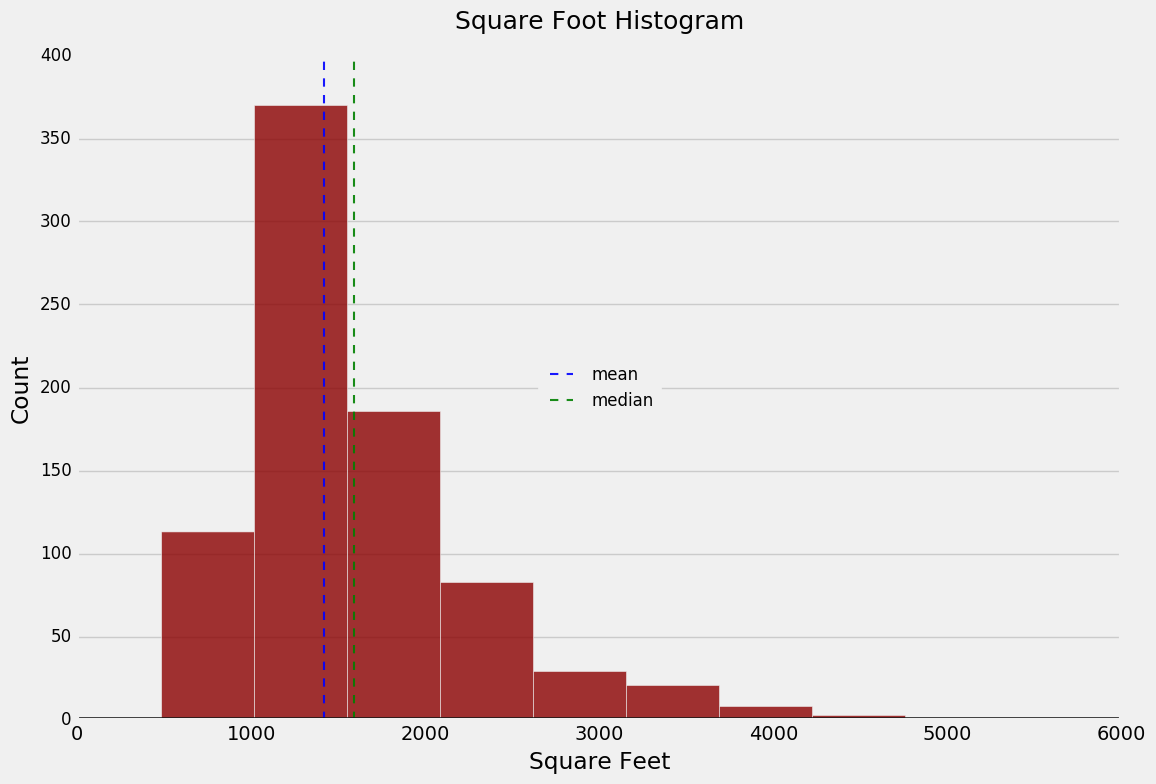

In [65]:
## Plot a histogram of time to peak chart position 
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

sac_hist = plt.hist(sac['sq__ft'], color = 'darkred', bins = 10, alpha = 0.8)

plt.axvline(sac['sq__ft'].median(), color='blue', linestyle='dashed', \
            linewidth=1.5, label = 'mean', alpha = 0.9)

plt.axvline(sac['sq__ft'].mean(), color='green', linestyle='dashed', \
            linewidth=1.5, label = 'median', alpha = 0.9)

plt.title('Square Foot Histogram', fontsize = 18, y = 1.03)

# y label
plt.ylabel('Count')

# x label
plt.xlabel('Square Feet')

plt.yticks(range(0,450,50), fontsize = 12)

# legend
plt.legend(loc='center', fontsize = 12)

#plt.xlim([0, 51])
#plt.ylim([0, 71])

plt.grid(which = 'major', axis = 'x') # gets rid of vertical grid lines

plt.axhline(0, color='black')

plt.show()

In [66]:
sac['type'].value_counts()

Residential     759
Condo            42
Multi-Family     13
Name: type, dtype: int64

In [67]:
len(sac[sac['type']=='Residential'])/float(len(sac))

0.9324324324324325

In [72]:
# Decided to look only at residential since its 93% of the remaining data set
sac_res = sac[sac['type'] == "Residential"]
sac_res = sac_res.reset_index(drop=True)

In [74]:
# ST, WAY, or DRIVE

title = []
for i in range(len(sac_res)):
    name = sac_res['street'][i].split()
    title.append(name[-1])

# set - shows unique values
set(title)

{'193',
 '24',
 '8',
 'AVE',
 'BLVD',
 'BROADWAY',
 'C',
 'CIR',
 'CONEJO',
 'CT',
 'DR',
 'GRANDE',
 'LN',
 'MARTINA',
 'PKWY',
 'PL',
 'RD',
 'ST',
 'TRL',
 'WAY'}

In [76]:
sac_res['Title'] = title
sac_res.head(5)

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,2796 BRANCH ST,SACRAMENTO,95815,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR


In [79]:
sac_res[sac_res['Title'] == '193']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
264,9970 STATE HIGHWAY 193,PLACERVILLE,95667,4,3,1929,Residential,Tue May 20 00:00:00 EDT 2008,485000,38.787877,-120.816676,193


In [80]:
sac_res['Title'][sac_res['Title'] == '193'] = 'HIGHWAY'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
sac_res[sac_res['Title'] == 'HIGHWAY']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
264,9970 STATE HIGHWAY 193,PLACERVILLE,95667,4,3,1929,Residential,Tue May 20 00:00:00 EDT 2008,485000,38.787877,-120.816676,HIGHWAY


In [83]:
sac_res[sac_res['Title'] == '24']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
509,1675 VERNON ST Unit 24,ROSEVILLE,95678,3,2,1174,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.734136,-121.299639,24


In [84]:
sac_res['Title'][sac_res['Title'] == '24'] = 'ST'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
sac_res[sac_res['Title'] == '8']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
320,1675 VERNON ST Unit 8,ROSEVILLE,95678,2,1,990,Residential,Mon May 19 00:00:00 EDT 2008,160000,38.734136,-121.299639,8


In [86]:
sac_res['Title'][sac_res['Title'] == '8'] = 'ST'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [87]:
sac_res[sac_res['Title'] == 'BROADWAY']
# leave as is

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
273,4030 BROADWAY,SACRAMENTO,95817,2,1,623,Residential,Mon May 19 00:00:00 EDT 2008,62050,38.546798,-121.460038,BROADWAY


In [88]:
sac_res[sac_res['Title'] == 'C']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
126,207 ORANGE BLOSSOM CIR Unit C,FOLSOM,95630,5,3,2687,Residential,Wed May 21 00:00:00 EDT 2008,460000,38.646273,-121.175322,C


In [89]:
sac_res['Title'][sac_res['Title'] == 'C'] = 'CIR'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
sac_res[sac_res['Title'] == 'CONEJO']
# leave as is - I guess? (GOOGLED)

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
256,6306 CONEJO,RANCHO MURIETA,95683,4,2,3192,Residential,Tue May 20 00:00:00 EDT 2008,425000,38.512602,-121.087233,CONEJO


In [91]:
sac_res[sac_res['Title'] == 'GRANDE']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
300,3128 VIA GRANDE,SACRAMENTO,95825,2,1,972,Residential,Mon May 19 00:00:00 EDT 2008,125000,38.598321,-121.39161,GRANDE


In [92]:
sac_res[sac_res['Title'] == 'MARTINA']

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Title
577,1813 AVENIDA MARTINA,ROSEVILLE,95747,3,2,1506,Residential,Fri May 16 00:00:00 EDT 2008,255000,38.776649,-121.339589,MARTINA


In [97]:
sac_res = sac_res[['city','zip','beds','baths','sq__ft','price', 'Title']]
sac_res.head(3)

,city,zip,beds,baths,sq__ft,price,Title
0,SACRAMENTO,95838,2,1,836,59222,ST
1,SACRAMENTO,95823,3,1,1167,68212,CT
2,SACRAMENTO,95815,2,1,796,68880,ST


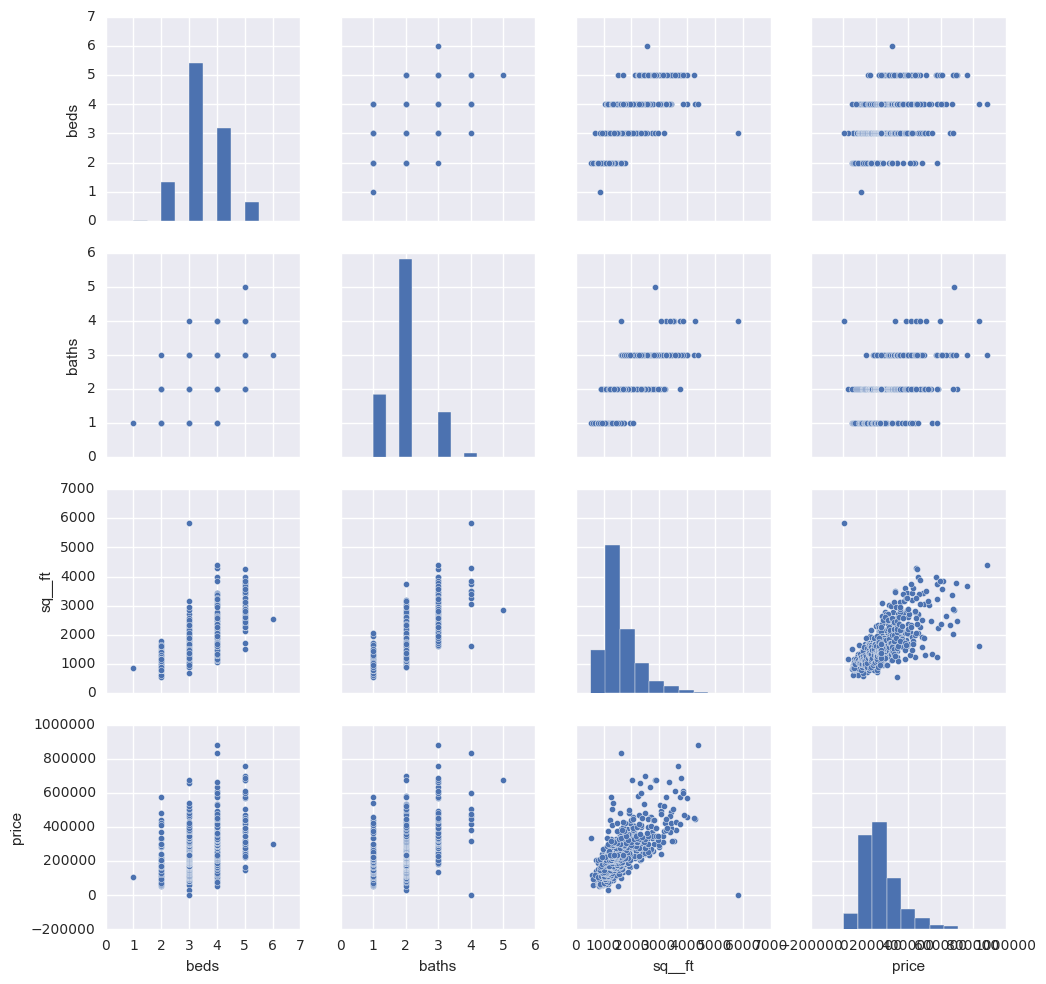

In [101]:
# Scatterplot Matrix
sns.pairplot(sac_res[['beds','baths','sq__ft','price']])

In [105]:
# Assign dummy variables
# use get_dummies

city_dummies = pd.get_dummies(sac_res[['city']])
city_dummies.head(2)

,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,city_EL DORADO,city_EL DORADO HILLS,city_ELK GROVE,...,city_RANCHO CORDOVA,city_RANCHO MURIETA,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
# drop one of the dummy columns
del city_dummies['city_ANTELOPE']

In [107]:
zip_dummies = pd.get_dummies(sac_res[['zip']])
zip_dummies.head(2)

,zip
0,95838
1,95823


In [110]:
type(sac_res['zip'][0])

numpy.int64

In [111]:
# Converts zip from int to string
sac_res['zip'] = sac_res['zip'].apply(lambda x: str(x))

In [115]:
zip_dummies = pd.get_dummies(sac_res[['zip']])
zip_dummies.head(2)

,zip_95603,zip_95608,zip_95610,zip_95614,zip_95619,zip_95621,zip_95623,zip_95624,zip_95626,zip_95628,...,zip_95831,zip_95832,zip_95833,zip_95834,zip_95835,zip_95838,zip_95841,zip_95842,zip_95843,zip_95864
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
del zip_dummies['zip_95603']

In [117]:
title_dummies = pd.get_dummies(sac_res[['Title']])
title_dummies.head(2)

,Title_AVE,Title_BLVD,Title_BROADWAY,Title_CIR,Title_CONEJO,Title_CT,Title_DR,Title_GRANDE,Title_HIGHWAY,Title_LN,Title_MARTINA,Title_PKWY,Title_PL,Title_RD,Title_ST,Title_TRL,Title_WAY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
del title_dummies['Title_AVE']

In [120]:
# take out variables that were dummified
del sac_res['city']
del sac_res['zip']
del sac_res['Title']

In [121]:
# concatenate dummy columns to original df
sac_res = pd.concat([sac_res, city_dummies, zip_dummies, title_dummies], axis = 1)

In [122]:
sac_res.head(3)

,beds,baths,sq__ft,price,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,...,Title_GRANDE,Title_HIGHWAY,Title_LN,Title_MARTINA,Title_PKWY,Title_PL,Title_RD,Title_ST,Title_TRL,Title_WAY
0,2,1,836,59222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,1167,68212,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,796,68880,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [123]:
len(sac_res.columns)

120

In [ ]:
from sklearn import linear_model as lm
